''' <br>
Author: Nikhil Patil<br>
Date: 17-11-2024<br>
Last Modified by: Nikhil Patil<br>
Last Modified time: 17-11-2024 <br>
Title: Python program to predict whether customer will exit `Multi Layer Neural Network`<br>

'''


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [3]:
# Suppress specific future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Importing data

In [4]:
bank_df = pd.read_csv('/content/Churn_Modelling.csv')
display(bank_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Display Stats

In [5]:
bank_df.info()
print("\nStats for the dataset are:")
bank_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Stats for the dataset are:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Encoding the data

In [6]:
label_encoder = LabelEncoder()
for column in bank_df.select_dtypes(include=['object']).columns:
    bank_df[column] = label_encoder.fit_transform(bank_df[column])

In [7]:
display(bank_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Data Visualization

### Display Correlation Matrix

In [8]:
correlation_matrix = bank_df.corr()
print(correlation_matrix)

                 RowNumber  CustomerId   Surname  CreditScore  Geography  \
RowNumber         1.000000    0.004202  0.001682     0.005840  -0.010358   
CustomerId        0.004202    1.000000  0.005689     0.005308   0.006516   
Surname           0.001682    0.005689  1.000000     0.007489  -0.022878   
CreditScore       0.005840    0.005308  0.007489     1.000000   0.007888   
Geography        -0.010358    0.006516 -0.022878     0.007888   1.000000   
Gender            0.018196   -0.002641 -0.002049    -0.002857   0.004719   
Age               0.000783    0.009497  0.005550    -0.003965   0.022812   
Tenure           -0.006495   -0.014883 -0.017412     0.000842   0.003739   
Balance          -0.009067   -0.012419  0.002657     0.006268   0.069408   
NumOfProducts     0.007246    0.016972 -0.016460     0.012238   0.003972   
HasCrCard         0.000599   -0.014025 -0.008993    -0.005458  -0.008523   
IsActiveMember    0.012044    0.001665  0.001483     0.025651   0.006724   
EstimatedSal

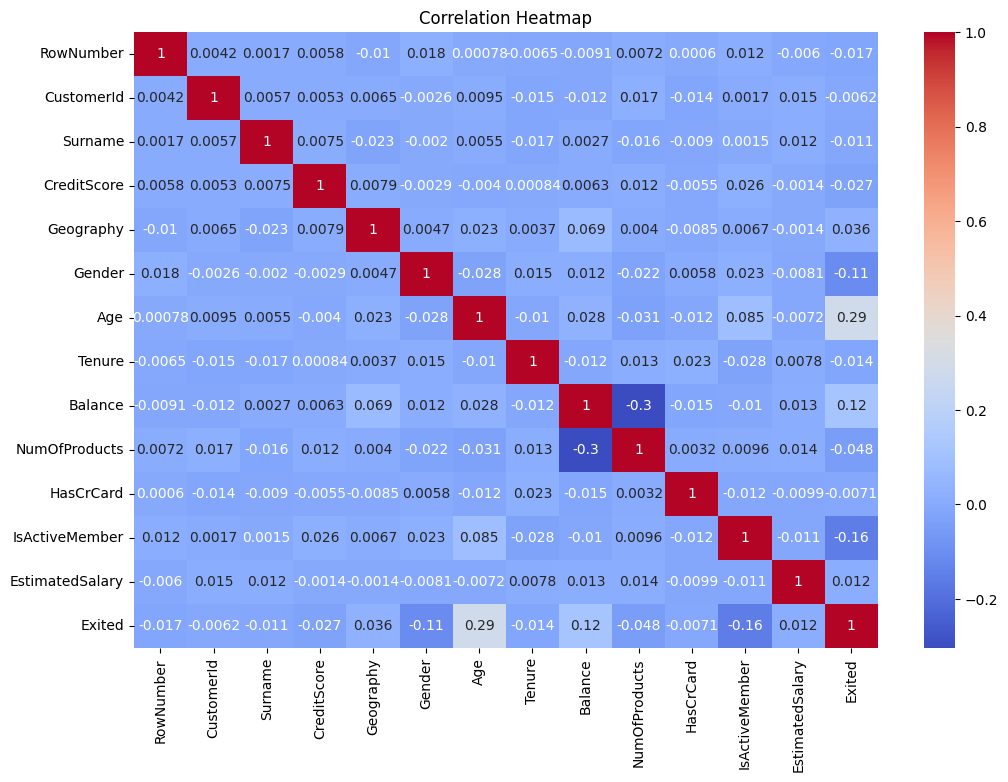

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Training

**Define Features and Target**

In [10]:
bank_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
X = bank_df.drop(['RowNumber', 'CustomerId','Surname','Exited'], axis = 1)
y = bank_df['Exited']

**Split the dataset into training and testing sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
feature_names = X.columns

**Feature scaling using StandardScaler**

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
y_train_binary = np.where(y_train == 1, 1, 0)
y_test_binary = np.where(y_test == 1, 1, 0)

**Fit the model**

In [16]:
# Create a Multi-Layer Neural Network model
model = Sequential()

# Input layer and first hidden layer (with 16 neurons and ReLU activation)
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer (with 8 neurons and ReLU activation)
model.add(Dense(8, activation='relu'))

# Output layer (with 1 neuron and sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train_binary, epochs=1024, batch_size=32, verbose=1)

Epoch 1/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8692 - loss: 0.3172
Epoch 2/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3237
Epoch 3/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8740 - loss: 0.3134
Epoch 4/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8765 - loss: 0.3058
Epoch 5/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8776 - loss: 0.3031
Epoch 6/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.3069
Epoch 7/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8741 - loss: 0.3092
Epoch 8/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3078
Epoch 9/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8684 - loss: 0.3185
Epoch 10/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8805 - loss: 0.3037
Epoch 11/1024
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.3045
Epoch 12/1024
235/235 ━━━━━━━━

KeyboardInterrupt: 

**Displaying Metrics**

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_binary, verbose=0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.3f}')

Test Accuracy: 85.52%
Test Loss: 0.344


**Predicting the test results**

In [24]:
predictions = model.predict(X_test_scaled)
predictions_binary = np.where(predictions > 0.5, 1, 0)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


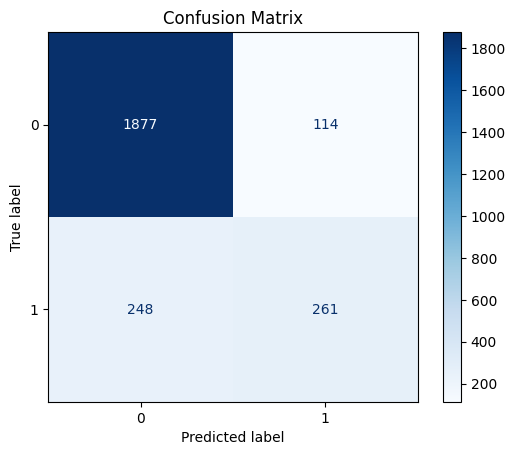

In [21]:
# Create confusion matrix
cm = confusion_matrix(y_test_binary, predictions_binary)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

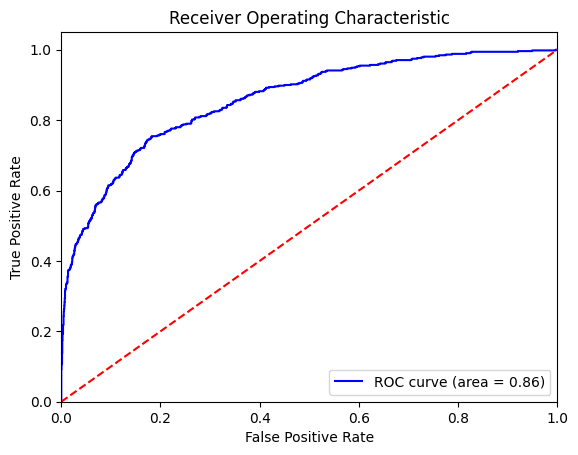

In [22]:


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
